## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [75]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [76]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [77]:
df.shape

(294478, 5)

c. The number of unique users in the dataset.

In [78]:
df.nunique()

user_id         290584
timestamp       294478
group                2
landing_page         2
converted            2
dtype: int64

d. The proportion of users converted.

In [79]:
df['converted'].mean()

0.11965919355605512

e. The number of times the `new_page` and `treatment` don't match.

In [80]:
#count The number of times the new_page and treatment don't match.
df_treatment = df.query('group == "treatment"')
df_new_notmatch = df_treatment.query('landing_page != "new_page"')['landing_page'].count()
#count The number of times the old_page and control don't match.
df_control = df.query('group == "control"')
df_old_notmatch = df_control.query('landing_page != "old_page"')['landing_page'].count()
df_new_notmatch,df_old_notmatch

(1965, 1928)

In [81]:
# create one table df_new match the new_page and treatment
df_treatment = df.query('group == "treatment"')
df_new = df_treatment.query('landing_page == "new_page"')
# create one table df_old match the old_page and control
df_control = df.query('group == "control"')
df_old = df_control.query('landing_page == "old_page"')

f. Do any of the rows have missing values?

In [82]:
df.isnull().any()

user_id         False
timestamp       False
group           False
landing_page    False
converted       False
dtype: bool

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [83]:
# Append df_new to df_old and store in a new table df2
df2 = df_new.append(df_old)
df2.head()

,user_id,timestamp,group,landing_page,converted
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1


In [84]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [85]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [86]:
# see if has duplicates in 'user_id'
df2[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [87]:
df2[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [88]:
#drop the duplicate 
df2.drop_duplicates('user_id', inplace=True)

In [89]:
#check if duplicate has been removed
df2[df2['user_id'].duplicated() == True]

,user_id,timestamp,group,landing_page,converted


`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [90]:
#the probability of an individual converting regardless of the page they receive
df2['converted'].mean()

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [91]:
df_control_mean = df2.query("group == 'control'")['converted'].mean()
df_control_mean


0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [92]:
df_treatment_mean = df2.query("group == 'treatment'")['converted'].mean()
df_treatment_mean

0.11880806551510564

d. What is the probability that an individual received the new page?

In [93]:
df2.query('landing_page == "new_page"').count()[0]/df2.shape[0]


0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

The probablity that control group converted is 0.1204, and the treatment group is 0.1188. The two values are very close to each other. It does not give a sufficient evidence to conclude that the new treatment page leads to more conversions.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

<p> H0 = Pnew <= Pold </p>
<p> H1 = Pnew > Pold </p>

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [94]:
Pnew = df2.converted.mean()
Pnew

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [95]:
Pold = df2.converted.mean()
Pold

0.11959708724499628

c. What is $n_{new}$, the number of individuals in the treatment group?

In [96]:
df_new = df2.query('landing_page == "new_page"')
n_new = df_new['landing_page'].count()
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [97]:
df_old = df2.query('landing_page == "old_page"')
n_old = df_old['landing_page'].count()
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [98]:
new_page_converted = np.random.choice([0,1],n_new,[Pnew,1-Pnew])
new_page_converted 

array([1, 1, 0, ..., 0, 1, 0])

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [99]:
old_page_converted = np.random.choice([0,1],n_old,[Pold,1-Pold])
old_page_converted

array([1, 0, 1, ..., 1, 0, 0])

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [100]:
diff = new_page_converted.mean() - old_page_converted.mean()
diff

0.0014245935037873192

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [101]:
# create sampling distribution of difference 
p_diffs = []
for _ in range(10000):
    new_page_converted_mean = np.random.choice([0,1],n_new,[Pnew,1-Pnew]).mean()
    old_page_converted_mean = np.random.choice([0,1],n_old,[Pold,1-Pold]).mean()
    p_diffs.append(new_page_converted_mean - old_page_converted_mean)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

(array([   35.,   147.,   602.,  1560.,  2496.,  2586.,  1647.,   692.,
          193.,    42.]),
 array([ -6.37318305e-03,  -5.11502994e-03,  -3.85687683e-03,
         -2.59872372e-03,  -1.34057061e-03,  -8.24174975e-05,
          1.17573561e-03,   2.43388872e-03,   3.69204183e-03,
          4.95019494e-03,   6.20834805e-03]),
 <a list of 10 Patch objects>)

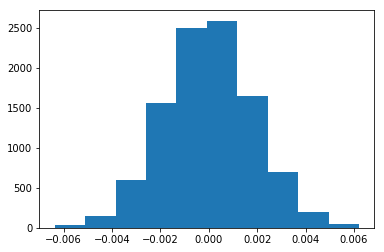

In [102]:
# convert to numpy array
p_diffs = np.array(p_diffs)
# plot sampling distribution
plt.hist(p_diffs)

(array([   24.,   148.,   638.,  1717.,  2800.,  2676.,  1403.,   486.,
           98.,    10.]),
 array([-0.00661589, -0.00525877, -0.00390165, -0.00254453, -0.00118741,
         0.00016971,  0.00152683,  0.00288395,  0.00424108,  0.0055982 ,
         0.00695532]),
 <a list of 10 Patch objects>)

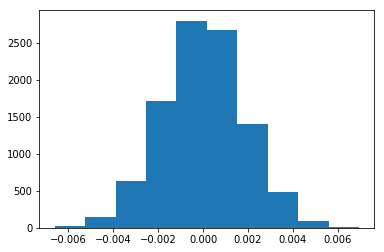

In [103]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0,p_diffs.std(),p_diffs.size)
# plot null distribution
plt.hist(null_vals)


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [104]:
obs_diff = df_treatment_mean - df_control_mean
# compute p value
(null_vals > obs_diff).mean()


0.80730000000000002

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

p-values are the probability of obtaining the observed stat if the null is true. In j, we find that p-value = 0.8073, which is a large number. Based on the data, we fail to reject the null hypothesis. There is no big difference between the new and old page. 

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [105]:
import statsmodels.api as sm
convert_old = df2.query("group == 'control'")['converted'].sum()
convert_new = df2.query("group == 'treatment'")['converted'].sum()
n_old = df2.query("landing_page == 'old_page'").shape[0]
n_new = df2.query("landing_page == 'new_page'").shape[0]

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [106]:
#caculate the z-score and p-value
stat,pval = sm.stats.proportions_ztest([convert_new,convert_old],[n_new,n_old],alternative = 'larger')
stat,pval

(-1.3109241984234394, 0.90505831275902449)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

When confidence level is 95%, the critical value should be around 1.645. Z-score that we computed is around 1.3109.  Z-score < crtical value, so we fail to reject the null hypothesis. It is same as the findings before.Also, the p-value is larger than 0.05.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

We need to use Logistic Regression to predict, because it only has two outcomes,the response variable is a categorical response.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [107]:
#create a dummy variable column for which page each user received
df2['intercept']=1
df2[['ab_page', 'old_page']] = pd.get_dummies(df2['landing_page'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,old_page
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0
6,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,0
8,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,0
9,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,0


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [108]:
logit_mod = sm.Logit(df2['converted'],df2[['intercept','ab_page',]])
results = logit_mod.fit()


Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [109]:
results.summary2()

<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-27 01:06 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9888    0.0081  -246.6690  0.0000  -2.0046  -1.9730
ab_page      -0.0150    0.0114    -1.3109  0.1899  -0.0374   0.0074
==================================================================

"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  

p-value associated with ab_page is 0.1899,so We fail to reject the null hypothesiss. In Part II, we are figuring out whether the old page is have higher converation rate than new page. In Part III, we are figuring out how the pages affect the converted rate. It predits only two possible outcomes : null: pnew = pold and alternative: pnew != pold.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Adding other factors can provide more information. It also enable us to see the more correlation factors. For instance, we have timesamp in our table, we could find what's the time that most people visited the pages. However, if we add some factors that lead to two dependent variiables correlated to each other, it will affect the results, and make the test not clear.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - 

In [110]:
df_co = pd.read_csv("countries.csv")
df_co = df2.merge(df_co, on='user_id', how='inner')
df_co.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,old_page,country
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,US
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,US
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,0,CA
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,0,UK
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,0,CA


In [111]:
df_co[['CA','UK']] = pd.get_dummies(df_co['country'])[['CA','UK']]
df_co.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page,old_page,country,CA,UK
0,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1,0,US,0,0
1,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1,0,US,0,0
2,679687,2017-01-19 03:26:46.940749,treatment,new_page,1,1,1,0,CA,1,0
3,817355,2017-01-04 17:58:08.979471,treatment,new_page,1,1,1,0,UK,0,1
4,839785,2017-01-15 18:11:06.610965,treatment,new_page,1,1,1,0,CA,1,0


In [112]:
logit_mod = sm.Logit(df_co['converted'],df_co[['intercept','CA','UK']])
results = logit_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-27 01:06 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9967    0.0068  -292.3145  0.0000  -2.0101  -1.9833
CA           -0.0408    0.0269    -1.5178  0.1291  -0.0935   0.0119
UK            0.0099    0.0133     0.7458  0.4558  -0.0161   0.0360
==================================================================

"""

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [113]:
logit_mod = sm.Logit(df_co['converted'],df_co[['intercept','CA','UK','ab_page']])
results = logit_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2020-04-27 01:06 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -1.9893    0.0089  -223.7628  0.0000  -2.0067  -1.9718
CA           -0.0408    0.0269    -1.5161  0.1295  -0.0934   0.0119
UK            0.0099    0.0133     0.7433  0.4573  -0.0162   0.0359
ab_page      -0.0149    0.0114    -1.3069  0.1912  -0.0374   0.0075
==================================================================

"""

As can be seen from above, p-value for those factors all greater than 0.05, so we fail to reject the null hypothesis.There is no statistically significant evidence that the country and page affect the conversions.

<a id='conclusions'></a>
## Conclusions
<p> In the first section of my data analysis, I explore whether the new page will bring more convertions than the old page. so I set the null hypothesis as Pnew<=Pold, and alternative as Pnew >Pold. By similating from the Null Hypothesis, we find p-value is greater than 0.05, so we fail to reject the null.Also, I compute the z-score, and indicates the same result. The old page is same or slightly higher convertions than the new page. </p>
<p> In my second  section, I use the Logistic regression to explore the relation between the pages and convertions. The result indicates that the pages has no significant influence on convertions. The result is same by adding 'country' factor. </p>

## Limitation
   <p> If we need to explore more factors that affect converted rate, the provided data is not enough.</p>
   <p> Missing values may affect the result.




In [114]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0